# Rain in Australia

# Introduction

## 1. Display Dataset

### 1.1 Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### 1.2 Importing Dataset

In [4]:
weather = pd.read_csv('Data/weatherAUS.csv') 
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# get list of categorical variables

categorical = list(weather.select_dtypes(object).columns)
print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [7]:
# get list of quantitative variables

quantitative = list(weather.select_dtypes(float).columns)
print(quantitative)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


#### There are 145460 rows and 23 columns in our dataset.

#### We can see that the dataset contains mixture of categorical and quantitative variables.

# 2. Data Cleaning

### 2.1 Change Date to datevalue

#### Before we do any data analysis, let's change the values in Date column to date format.

In [8]:
# extract Year, Month and Day value and store in new columns

weather.Date = pd.to_datetime(weather.Date, format = '%Y-%m-%d')
weather['Year'] = weather.Date.dt.year
weather['Month'] = weather.Date.dt.month
weather['Day'] = weather.Date.dt.day
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


### 2.2 Visualizing Missing Values ¶


#### Let's now check the dataset for missing values.

<AxesSubplot:>

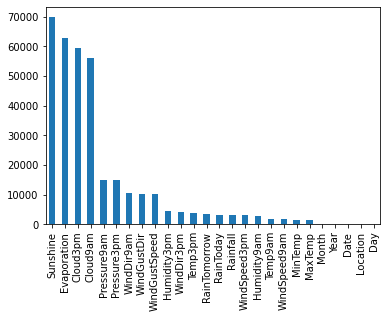

In [9]:
weather.isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

#### From the above plot, we can see that Sunshine,  Evaporation, Cloud3pm and Cloud9am have a lot of missing values.

#### Percentage of missing values for each column is as shown below.

In [10]:
# count the number of missing values by column and show the percentage, then sort from largest to smallest

nullsum = weather.isnull().sum().sort_values(ascending=False)
nullmean = weather.isnull().mean().sort_values(ascending=False)

missing_values = pd.concat([nullsum, round(nullmean*100,2)], axis=1, keys=['Null values','%'])
missing_values

,Null values,%
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [11]:
# check total number of missing values

num_missing = weather.shape[0] - weather.count()
sum(num_missing)

343248

#### In total, there are about 343K missing values. 

### 2.3 Check number of data by year

In [12]:
countyear = weather.groupby('Year').count()
print(countyear['Date'])

Year
2007       61
2008     2270
2009    16789
2010    16782
2011    15407
2012    15409
2013    16415
2014    17885
2015    17885
2016    17934
2017     8623
Name: Date, dtype: int64


#### It appears that 2007, 2008 and 2017 do not have full year data.

### 2.4 Check number of data by location

In [13]:
countlocation = weather.groupby('Location').count()
countlocation = countlocation.sort_values(by = 'Date', ascending = False)
print(countlocation['Date'])

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Melbourne           3193
Perth               3193
Hobart              3193
Brisbane            3193
Darwin              3193
Albany              3040
Launceston          3040
GoldCoast           3040
Townsville          3040
MountGambier        3040
Cairns              3040
Bendigo             3040
Ballarat            3040
Wollongong          3040
AliceSprings        3040
Albury              3040
MountGinini         3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Moree               3009
Sale                3009
BadgerysCreek       3009
Witchcliffe         3009
Williamtown         3009
Watsonia            3009
WaggaWagga          3009
Cobar               3009
CoffsHarbour        3009
SydneyAirport       3009
Dartmoor            3009
Mildura             3009
Woomera             3009
Richmond            3009
Portland            3009
PerthAirport        3009
MelbourneAirport

#### Nhil, Uluru and Katherine has about 50% less data than other locations.

### 2.5 Deal with Missing Values

#### We will drop columns with a high number of missing values:

#### 1. Columns: "Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"

#### 2. Year: "2007","2008", "2017"

#### 3. Locations: "Nhil", "Uluru", "Katherine"

#### 4. Rows without RainToday or RainTomorrow data

In [14]:
# drop columns with many missing values

weather.drop(["Sunshine","Evaporation","Cloud3pm","Cloud9am"], axis = 1, inplace = True)

In [15]:
# drop Year 2007,2008,2017

weather.drop(weather.index[(weather['Year'] == 2007) | (weather['Year'] == 2008) | (weather['Year'] == 2017)], inplace = True)

In [16]:
# drop Location: Uluru, Katherine, Nhil

weather.drop(weather.index[(weather['Location'] == 'Uluru') | (weather['Location'] == 'Katherine') | (weather['Location'] == 'Nhil')], inplace = True)

In [17]:
# drop rows with missing values in either the column of raintoday or raintomorrow

weather.dropna(axis=0,subset=['RainTomorrow','RainToday'], inplace= True)

In [18]:
# check number of missing values again

nullsum = weather.isnull().sum().sort_values(ascending=False)
nullmean = weather.isnull().mean().sort_values(ascending=False)

missing_values = pd.concat([nullsum, round(nullmean*100,2)], axis=1, keys=['Null values','%'])
missing_values

,Null values,%
Pressure3pm,12815,10.17
Pressure9am,12793,10.15
WindDir9am,8878,7.04
WindGustDir,8221,6.52
WindGustSpeed,8164,6.48
WindDir3pm,3238,2.57
Humidity3pm,2287,1.81
WindSpeed3pm,2161,1.71
Temp3pm,1588,1.26
Humidity9am,1345,1.07


#### There are still missing values in 14 columns. Next we will fill missing values.

#### Weather data varies from month to month in each location, so we will be filling missing values using the average of each month by location


In [19]:
# fill the missing values for continuous variables with using transform('mean')

weather["Pressure3pm"] = weather["Pressure3pm"].fillna(weather.groupby(['Location','Year','Month'])["Pressure3pm"].transform('mean'))
weather["Pressure9am"] = weather["Pressure9am"].fillna(weather.groupby(['Location','Year','Month'])["Pressure9am"].transform('mean'))
weather["WindGustSpeed"] = weather["WindGustSpeed"].fillna(weather.groupby(['Location','Year','Month'])["WindGustSpeed"].transform('mean'))
weather["Humidity3pm"] = weather["Humidity3pm"].fillna(weather.groupby(['Location','Year','Month'])["Humidity3pm"].transform('mean'))
weather["WindSpeed3pm"] = weather["WindSpeed3pm"].fillna(weather.groupby(['Location','Year','Month'])["WindSpeed3pm"].transform('mean'))
weather["Temp3pm"] = weather["Temp3pm"].fillna(weather.groupby(['Location','Year','Month'])["Temp3pm"].transform('mean'))
weather["Humidity9am"] = weather["Humidity9am"].fillna(weather.groupby(['Location','Year','Month'])["Humidity9am"].transform('mean'))
weather["WindSpeed9am"] = weather["WindSpeed9am"].fillna(weather.groupby(['Location','Year','Month'])["WindSpeed9am"].transform('mean'))
weather["Temp9am"] = weather["Temp9am"].fillna(weather.groupby(['Location','Year','Month'])["Temp9am"].transform('mean'))
weather["MinTemp"] = weather["MinTemp"].fillna(weather.groupby(['Location','Year','Month'])["MinTemp"].transform('mean'))
weather["MaxTemp"] = weather["MaxTemp"].fillna(weather.groupby(['Location','Year','Month'])["MaxTemp"].transform('mean'))

In [20]:
# after filling missing values, let's check number of missing values again

nullsum = weather.isnull().sum().sort_values(ascending=False)
nullmean = weather.isnull().mean().sort_values(ascending=False)

missing_values = pd.concat([nullsum, round(nullmean*100,2)], axis=1, keys=['Null values','%'])
missing_values

,Null values,%
Pressure9am,12416,9.85
Pressure3pm,12416,9.85
WindDir9am,8878,7.04
WindGustDir,8221,6.52
WindGustSpeed,6736,5.34
WindDir3pm,3238,2.57
WindSpeed3pm,1443,1.14
Humidity3pm,1394,1.11
Temp3pm,976,0.77
WindSpeed9am,467,0.37


#### We managed to fill missing values for 3 columns, there are remaining 11 columns with missing values because some months do not have data at all.

### 2.6 Create weather_model dataframe

In [21]:
# we then create a subset dataframe called weather_model without any missing values for modeling purposes

weather_model = weather.dropna(how='any')

In [22]:
# Date and Location columns are not needed for modelling

weather_model.drop(['Date','Location'], axis = 1, inplace = True)

C:\Users\mouli\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
# check to see there are no missing values

nullsum = weather_model.isnull().sum().sort_values(ascending=False)
nullmean = weather_model.isnull().mean().sort_values(ascending=False)

missing_values = pd.concat([nullsum, round(nullmean*100,2)], axis=1, keys=['Null values','%'])
missing_values

,Null values,%
MinTemp,0,0.0
MaxTemp,0,0.0
Month,0,0.0
Year,0,0.0
RainTomorrow,0,0.0
RainToday,0,0.0
Temp3pm,0,0.0
Temp9am,0,0.0
Pressure3pm,0,0.0
Pressure9am,0,0.0


#### Now we are ready to do some data analysis.

# 3. Data Analysis


#### We will be using the original dataframe "weather" to do data analysis

### 3.1 Which year has the most number of rainy days?

#### Using count(), groupby and sort_values function, 2016 observed the most number of rainy days in the past 8 years

In [24]:
rainedtoday = weather[weather['RainToday'] == "Yes"]
countrain_year = rainedtoday.groupby('Year').count()
countrain_year = countrain_year.sort_values(by=['RainToday'], ascending = False)
print(countrain_year['RainToday'])

Year
2016    3958
2010    3953
2011    3691
2009    3566
2015    3496
2014    3356
2012    3340
2013    3302
Name: RainToday, dtype: int64


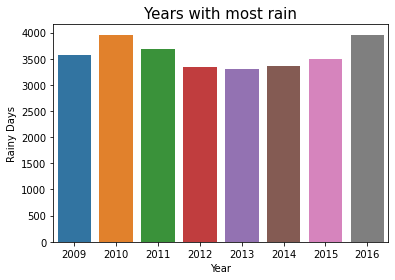

In [25]:
# visualizing

rainedtoday = weather[weather['RainToday'] == "Yes"]

count, ax = plt.subplots()

ax = sns.countplot(x = "Year", data = rainedtoday)
ax.set_title('Years with most rain', size = 15)
ax.set_xlabel('Year')
ax.set_ylabel('Rainy Days')

plt.show()


### 3.2 Which month has the most number of rainy days?

#### Using count(), groupby, get_group and sort_values function, July observed the most number of rainy days in the past 8 years

In [26]:
month_raintoday = weather[['Month','RainToday']]
yesrain=month_raintoday.groupby('RainToday').get_group('Yes')
month_yesrain=yesrain.groupby('Month').count()
month_yesrain.sort_values(by=['RainToday'], ascending = False)

,RainToday
Month,
7,3026
6,2987
8,2877
5,2515
9,2477
3,2327
11,2275
10,2232
4,2093


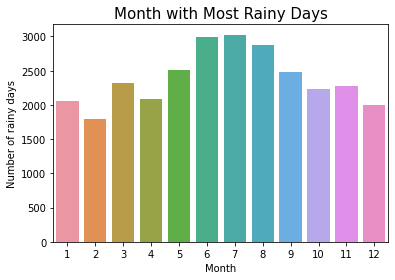

In [27]:
# visualizing

count, ax = plt.subplots()

ax = sns.countplot(x = "Month", data = yesrain)
ax.set_title('Month with Most Rainy Days', size = 15)
ax.set_xlabel('Month')
ax.set_ylabel('Number of rainy days')

plt.show()


### 3.3 Let's also check overall which year observed the highest amount of rainfall. 

#### Using sum() and groupby function, 2010 observed the highest amount of rainfall in the past 8 years

#### While 2016 has the most number of rainy days, 2010 has the highest amount of rainfall. 


In [28]:
overallrainfall = weather[['Year','Rainfall']]
overallrainfall = overallrainfall.groupby('Year').sum()
overallrainfall

,Rainfall
Year,
2009,35652.5
2010,43828.6
2011,42163.4
2012,35825.5
2013,34774.1
2014,32083.0
2015,35083.1
2016,39494.5


<AxesSubplot:title={'center':'Total Rainfall by Year'}, xlabel='Year', ylabel='Total Rainfall'>

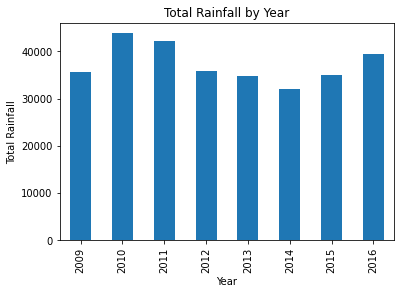

In [29]:
overallrainfall['Rainfall'].plot(kind = 'bar', title = 'Total Rainfall by Year', xlabel = 'Year', ylabel = 'Total Rainfall')

### 3.4 Which month observed the highest amount of rainfall?

#### Using sum() and groupby function, June observed the highest amount of rainfall in the past 8 years


In [30]:
month_rainfall = weather[['Month','Rainfall']]
month_rainfall = month_rainfall.groupby('Month').sum()
month_rainfall

,Rainfall
Month,
1,30330.6
2,28192.7
3,29242.0
4,22739.5
5,22994.6
6,31293.8
7,24631.4
8,23234.1
9,20469.2


<AxesSubplot:title={'center':'Total Rainfall by Month'}, xlabel='Month', ylabel='Total Rainfall'>

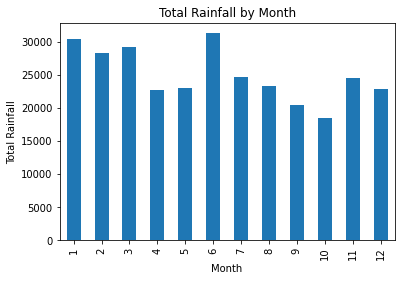

In [31]:
# visualizing 

month_rainfall['Rainfall'].plot(kind = 'bar', title = 'Total Rainfall by Month', xlabel = 'Month', ylabel = 'Total Rainfall')

#### Let's see which year contributed most to June's rainfall.

In [32]:
june_rainfall = weather[weather['Month'] == 6][['Year','Rainfall']]
june_rainfall = june_rainfall.groupby('Year').sum()
june_rainfall

,Rainfall
Year,
2009,3819.5
2010,2668.9
2011,3351.5
2012,4569.6
2013,4466.0
2014,3201.1
2015,2737.9
2016,6479.3


<AxesSubplot:title={'center':'June Rainfall by Year'}, xlabel='Year', ylabel='Total Rainfall'>

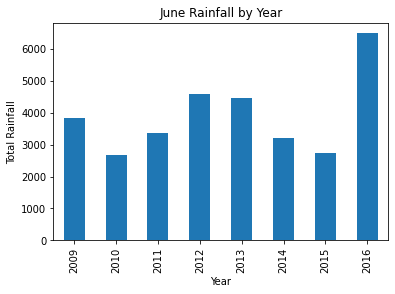

In [33]:
june_rainfall['Rainfall'].plot(kind = 'bar', title = 'June Rainfall by Year', xlabel = 'Year', ylabel = 'Total Rainfall')

#### 2016 contributed the most to June rainfall.

#### According to the Australia Bureau of Meteorology, June 2016 was a very wet month over most parts of Australia. It was the second-wettest June on record nationally.


### 3.5 Which State had the most rainfall overall?

In [34]:
# Dictionary with locations with repective state in Australia

State_dict = {'New South Wales' : ['Albury','BadgerysCreek','Cobar','CoffsHarbour','Moree','Newcastle',
                                   'NorahHead','Penrith','Richmond','Sydney','SydneyAirport','WaggaWagga',
                                   'Williamtown','Wollongong'],
              
              'Norfolk Island' : ['NorfolkIsland'],
              
              'Australian Capital Territory' : ['Canberra','Tuggeranong','MountGinini'],
              
              'Victoria' : ['Ballarat','Bendigo','Sale','MelbourneAirport','Melbourne','Mildura','Nhil','Portland',
                            'Watsonia','Dartmoor'],
              
              'Queensland' : ['Brisbane','Cairns','GoldCoast','Townsville'],
              
          'South Australia' : ['Adelaide','MountGambier','Nuriootpa','Woomera'],
              
              'Western Australia' : ['Albany','Witchcliffe','PearceRAAF','PerthAirport',
                                     'Perth','SalmonGums','Walpole'],
              
              'Tasmania': ['Hobart','Launceston'],
              
              'Northern Territory' : ['AliceSprings','Darwin','Katherine','Uluru']}

In [35]:
# Creating an exact copy of the cleaned dataframe for this Analysis  

weatherwithstate = weather.copy()
weatherwithstate

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
31,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.000000,...,26.0,1004.5,1003.2,19.7,25.7,No,No,2009,1,1
32,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.000000,...,22.0,1014.4,1013.1,14.9,22.1,No,No,2009,1,2
33,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.000000,...,22.0,1018.7,1014.8,17.1,26.5,No,No,2009,1,3
34,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.000000,...,12.0,1015.1,1010.3,20.7,33.9,No,No,2009,1,4
35,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.000000,...,9.0,1012.6,1009.2,22.4,34.4,No,No,2009,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142123,2016-12-27,Darwin,24.4,31.6,31.8,NaN,41.2,ENE,WSW,2.000000,...,80.0,1006.1,1004.5,28.8,28.9,Yes,Yes,2016,12,27
142124,2016-12-28,Darwin,23.9,28.7,58.4,NW,56.0,NaN,WNW,10.466667,...,84.0,1007.2,1004.9,25.0,27.5,Yes,Yes,2016,12,28
142125,2016-12-29,Darwin,25.2,31.7,25.2,W,41.0,S,WSW,17.000000,...,66.0,1006.8,1003.5,26.9,30.6,Yes,Yes,2016,12,29
142126,2016-12-30,Darwin,26.3,30.9,5.4,SSW,52.0,W,S,24.000000,...,90.0,1003.9,1004.1,29.6,24.1,Yes,Yes,2016,12,30


In [36]:
# Function to look for a location in State_dict and add a column with the respective State
# Apply function on the dataset

def location_State(x):
    for State,Locations in State_dict.items():
        for Location in Locations: 
            if x['Location'] == Location:
                return State

weatherwithstate['State'] = weatherwithstate.apply(location_State, axis=1)

In [37]:
weatherwithstate.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,State
31,2009-01-01,Albury,11.3,26.5,0.0,WNW,56.0,W,WNW,19.0,...,1004.5,1003.2,19.7,25.7,No,No,2009,1,1,New South Wales
32,2009-01-02,Albury,9.6,23.9,0.0,W,41.0,WSW,SSW,19.0,...,1014.4,1013.1,14.9,22.1,No,No,2009,1,2,New South Wales
33,2009-01-03,Albury,10.5,28.8,0.0,SSE,26.0,SSE,E,11.0,...,1018.7,1014.8,17.1,26.5,No,No,2009,1,3,New South Wales
34,2009-01-04,Albury,12.3,34.6,0.0,WNW,37.0,SSE,NW,6.0,...,1015.1,1010.3,20.7,33.9,No,No,2009,1,4,New South Wales
35,2009-01-05,Albury,12.9,35.8,0.0,WNW,41.0,ENE,NW,6.0,...,1012.6,1009.2,22.4,34.4,No,No,2009,1,5,New South Wales


In [38]:
# we check which State observed the highest amount of rainfall

mostrainfallstate=weatherwithstate.groupby(['State']).sum()
mostrainfallstate.sort_values(by=['Rainfall'], ascending = False, inplace =True)

In [39]:
mostrainfallstate

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
State,,,,,,,,,,,,,,,
New South Wales,485692.111198,901677.644759,101380.9,1.332617e+06,475036.459129,657611.984165,2.633563e+06,1.924556e+06,3.282113e+07,3.273730e+07,662203.306700,835912.502594,76463112,248450,597636
Queensland,207954.006603,307516.011720,44112.2,4.085339e+05,158926.161259,229646.979884,7.302187e+05,6.510138e+05,1.127762e+07,1.124384e+07,264414.102910,288188.681960,22328352,72492,174753
Victoria,228069.058901,499509.649655,42762.1,1.020975e+06,374353.825616,484788.202709,1.824396e+06,1.305926e+06,2.488550e+07,2.484095e+07,331168.942010,463226.573390,49198763,160518,385264
Western Australia,225335.024224,444494.017463,39419.6,6.563235e+05,275744.778584,341371.912125,1.252275e+06,9.397499e+05,1.650531e+07,1.647138e+07,332651.550754,403544.694860,38389005,124092,300422
Australian Capital Territory,47388.318898,145621.072667,19746.6,3.187963e+05,90718.978878,131619.835617,6.074744e+05,4.427030e+05,5.445402e+06,5.430500e+06,87170.321792,133500.949337,16434732,53492,128634
Northern Territory,102391.316782,174357.080000,16545.8,2.301744e+05,85132.285057,110726.033333,3.064914e+05,2.148123e+05,5.741314e+06,5.720450e+06,136947.300000,166755.201264,11390828,36952,89025
South Australia,122109.121122,252699.663908,15539.2,4.610330e+05,173720.358456,215909.593068,7.100967e+05,4.905542e+05,1.135868e+07,1.133545e+07,176198.284599,236566.352053,22443541,72798,175485
Tasmania,47524.642299,103467.597931,10503.7,2.349220e+05,69735.709524,99742.304324,4.099088e+05,3.119811e+05,4.740173e+06,4.732195e+06,68829.504187,95093.547660,11352584,36868,88736
Norfolk Island,46949.513333,60774.000000,8894.6,1.196020e+05,56531.005492,61475.508046,1.985217e+05,1.900530e+05,2.852521e+06,2.847645e+06,55046.506667,57019.342299,5640992,18199,43983


In [40]:
# Dropping index to get state column

TotalRainfallbyState = mostrainfallstate.reset_index()
TotalRainfallbyState

,State,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
0,New South Wales,485692.111198,901677.644759,101380.9,1.332617e+06,475036.459129,657611.984165,2.633563e+06,1.924556e+06,3.282113e+07,3.273730e+07,662203.306700,835912.502594,76463112,248450,597636
1,Queensland,207954.006603,307516.011720,44112.2,4.085339e+05,158926.161259,229646.979884,7.302187e+05,6.510138e+05,1.127762e+07,1.124384e+07,264414.102910,288188.681960,22328352,72492,174753
2,Victoria,228069.058901,499509.649655,42762.1,1.020975e+06,374353.825616,484788.202709,1.824396e+06,1.305926e+06,2.488550e+07,2.484095e+07,331168.942010,463226.573390,49198763,160518,385264
3,Western Australia,225335.024224,444494.017463,39419.6,6.563235e+05,275744.778584,341371.912125,1.252275e+06,9.397499e+05,1.650531e+07,1.647138e+07,332651.550754,403544.694860,38389005,124092,300422
4,Australian Capital Territory,47388.318898,145621.072667,19746.6,3.187963e+05,90718.978878,131619.835617,6.074744e+05,4.427030e+05,5.445402e+06,5.430500e+06,87170.321792,133500.949337,16434732,53492,128634
5,Northern Territory,102391.316782,174357.080000,16545.8,2.301744e+05,85132.285057,110726.033333,3.064914e+05,2.148123e+05,5.741314e+06,5.720450e+06,136947.300000,166755.201264,11390828,36952,89025
6,South Australia,122109.121122,252699.663908,15539.2,4.610330e+05,173720.358456,215909.593068,7.100967e+05,4.905542e+05,1.135868e+07,1.133545e+07,176198.284599,236566.352053,22443541,72798,175485
7,Tasmania,47524.642299,103467.597931,10503.7,2.349220e+05,69735.709524,99742.304324,4.099088e+05,3.119811e+05,4.740173e+06,4.732195e+06,68829.504187,95093.547660,11352584,36868,88736
8,Norfolk Island,46949.513333,60774.000000,8894.6,1.196020e+05,56531.005492,61475.508046,1.985217e+05,1.900530e+05,2.852521e+06,2.847645e+06,55046.506667,57019.342299,5640992,18199,43983


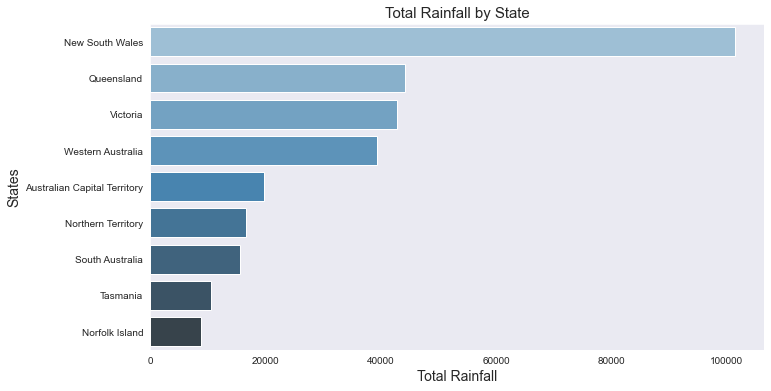

In [41]:
#Visualize

sns.set_style('dark')
fig, ax = plt.subplots(figsize=[11,6])
sns.barplot(x='Rainfall',y='State', linewidth=1,
             palette="Blues_d", 
            data=TotalRainfallbyState,orient = 'h')

ax.set_title("Total Rainfall by State", size = 15)
ax.set_xlabel('Total Rainfall',size = 14)
ax.set_ylabel('States',size = 14)
plt.show()

### 3.6 Next, we will use line plots to visualize which are the significant predictors to forecast next-day rain.

#### For this section, we will use the "weather_model" dataframe which has no missing values. The results from this section will help us select predictors for data modelling.

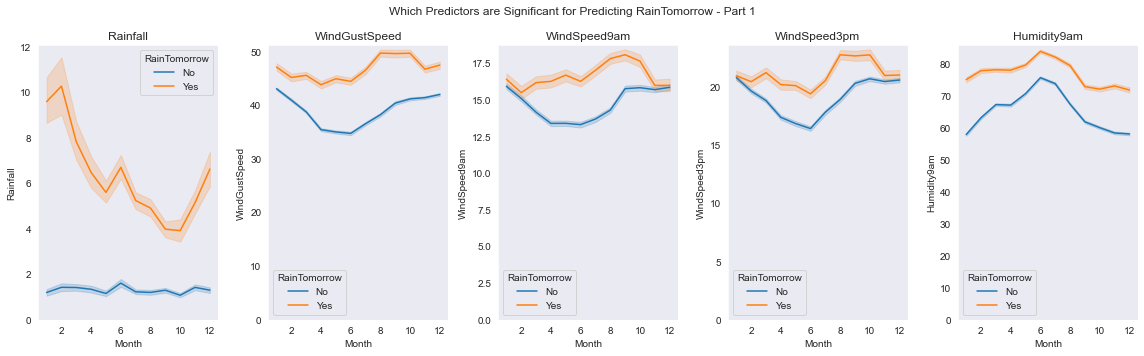

In [42]:
fig, axes = plt.subplots(1, 5, figsize=(16,5))
fig.suptitle('Which Predictors are Significant for Predicting RainTomorrow - Part 1')

g = sns.lineplot(x = weather_model.Month, y = weather_model.Rainfall, hue = weather_model.RainTomorrow, ax=axes[0])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='Rainfall')

g = sns.lineplot(x = weather_model.Month, y = weather_model.WindGustSpeed, hue = weather_model.RainTomorrow, ax=axes[1])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='WindGustSpeed')

g = sns.lineplot(x = weather_model.Month, y = weather_model.WindSpeed9am, hue = weather_model.RainTomorrow, ax=axes[2])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='WindSpeed9am')

g = sns.lineplot(x = weather_model.Month, y = weather_model.WindSpeed3pm, hue = weather_model.RainTomorrow, ax=axes[3])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='WindSpeed3pm')

g = sns.lineplot(x = weather_model.Month, y = weather_model.Humidity9am, hue = weather_model.RainTomorrow, ax=axes[4])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='Humidity9am')


plt.tight_layout()
plt.show()

#### Based on Part 1, Rainfall, WindGustSpeed and Humidity9am provide good differentiation. These are good predictors.

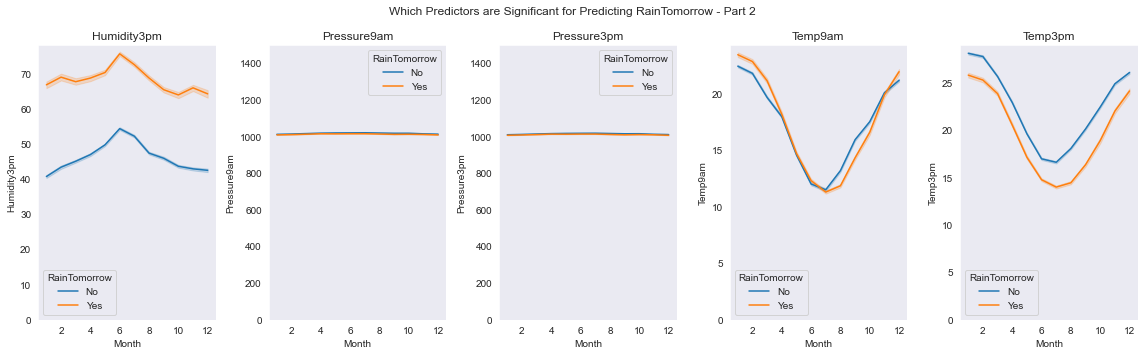

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(16,5))
fig.suptitle('Which Predictors are Significant for Predicting RainTomorrow - Part 2')


g = sns.lineplot(x = weather_model.Month, y = weather_model.Humidity3pm, hue = weather_model.RainTomorrow, ax=axes[0])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='Humidity3pm')

g = sns.lineplot(x = weather_model.Month, y = weather_model.Pressure9am, hue = weather_model.RainTomorrow, ax=axes[1])
g.set(ylim=(0, 1500), xticks=[2,4,6,8,10,12], title='Pressure9am')

g = sns.lineplot(x = weather_model.Month, y = weather_model.Pressure3pm, hue = weather_model.RainTomorrow, ax=axes[2])
g.set(ylim=(0, 1500), xticks=[2,4,6,8,10,12], title='Pressure3pm')

g = sns.lineplot(x = weather_model.Month, y = weather_model.Temp9am, hue = weather_model.RainTomorrow, ax=axes[3])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='Temp9am')

g = sns.lineplot(x = weather_model.Month, y = weather_model.Temp3pm, hue = weather_model.RainTomorrow, ax=axes[4])
g.set(ylim=(0, None), xticks=[2,4,6,8,10,12], title='Temp3pm')

plt.tight_layout()
plt.show()

#### Based on Part 2, Humidity3pm seem to provide good differentiation. There are now four potential good quantitative predictors.

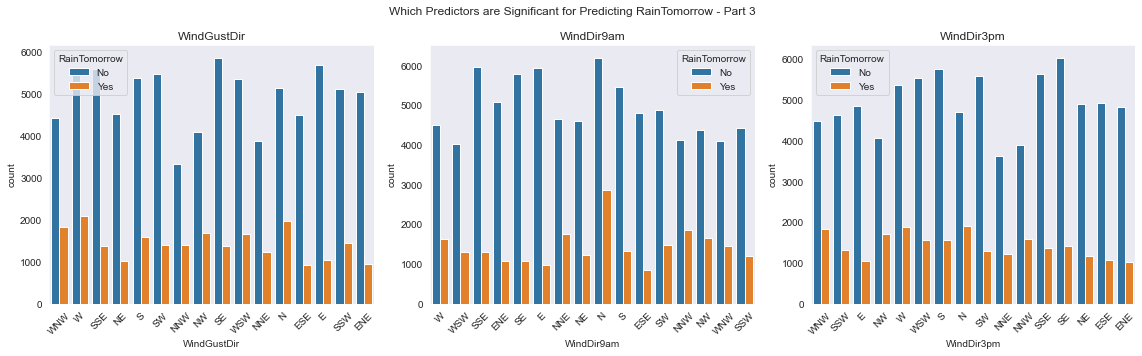

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle('Which Predictors are Significant for Predicting RainTomorrow - Part 3')
#ax = sns.barplot(x="day", y="total_bill", data=tips)


g = sns.countplot(x = "WindGustDir", hue = "RainTomorrow", data=weather_model, ax=axes[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("WindGustDir")

g = sns.countplot(x = "WindDir9am", hue = "RainTomorrow", data=weather_model, ax=axes[1])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("WindDir9am")

g = sns.countplot(x = "WindDir3pm", hue = "RainTomorrow", data=weather_model, ax=axes[2])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("WindDir3pm")

plt.tight_layout()
plt.show()

#### Lastly, based on all the categorical variables, it looks like all could be good predictors.
 
#### In total, we have four potential quantitative predictors and three potential categorical predictors.

### 3.7 Let's now see how Wind Gust Speed differ from month to month, and which month has the strongest or weakest wind gust?


In [45]:
# ExtractRelevantFields
GustYear = weather[['Year','Month','WindGustSpeed']]

# FastestGustSpeeds
MaxGust = GustYear.groupby("Month").WindGustSpeed.aggregate([np.max,np.min,np.mean])
max_gust=MaxGust[(MaxGust['mean']==MaxGust['mean'].max())]

# SlowestGustSpeeds
MinGust = GustYear.groupby("Month").WindGustSpeed.aggregate([np.max,np.min,np.mean])
min_gust=MinGust[(MaxGust['mean']==MaxGust['mean'].min())]

print("Minimum gust speeds for months that contribute the least.:\n\n",
      min_gust)
print('========================================')
print("Maximum gust speeds for months that contribute the most :\n\n",
      max_gust)

Minimum gust speeds for months that contribute the least.:

         amax  amin       mean
Month                        
6      113.0   7.0  35.933263
Maximum gust speeds for months that contribute the most :

         amax  amin       mean
Month                        
1      124.0  17.0  43.546394


In [46]:
# min gust speed locations

# weather[(weather['WindGustSpeed'] == 7.0) & (weather['Month'] == 6) ]
weather[['Location','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','Year','Month','Day']] [(weather['WindGustSpeed'] == 7.0) & (weather['Month'] == 6)]


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,Year,Month,Day
4572,BadgerysCreek,0.0,WSW,7.0,N,NNW,4.0,2013,6,10
25690,Penrith,0.0,N,7.0,NaN,SSW,0.0,2013,6,10
26432,Penrith,0.2,WNW,7.0,NaN,NaN,0.0,2015,6,22
26805,Penrith,0.0,NW,7.0,NaN,NW,0.0,2016,6,29
133591,Launceston,0.0,NNW,7.0,NaN,SE,0.0,2010,6,14
133604,Launceston,0.0,WNW,7.0,NaN,NW,0.0,2010,6,27
133607,Launceston,7.8,E,7.0,NaN,NE,0.0,2010,6,30
134287,Launceston,0.0,NNE,7.0,NaN,NaN,0.0,2012,6,9
134958,Launceston,0.0,ENE,7.0,NaN,NE,0.0,2014,6,9


In [47]:
# max gust speed locations

# weather[weather['WindGustSpeed'] == 124.0]
weather[['Location','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','Year','Month','Day']] [(weather['WindGustSpeed'] == 124.0)]


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,Year,Month,Day
107602,Woomera,0.0,WSW,124.0,WNW,NW,19.0,2014,10,31
130043,Hobart,0.0,NW,124.0,N,NW,31.0,2009,1,22


In [48]:
# Visualize Average Gust Speeds by Months

GustSpeed = GustYear.groupby('Month').WindGustSpeed.mean()
GustSpeed

Month
1     43.546394
2     41.326004
3     39.456941
4     36.609423
5     36.051343
6     35.933263
7     37.829825
8     40.273987
9     42.243851
10    42.657285
11    42.423893
12    42.877210
Name: WindGustSpeed, dtype: float64

In [49]:
# Converting to dataframe and dropping index to get Month Column

FrameGustSpeed = GustSpeed.to_frame()
GustSpeedMonth = FrameGustSpeed.reset_index()

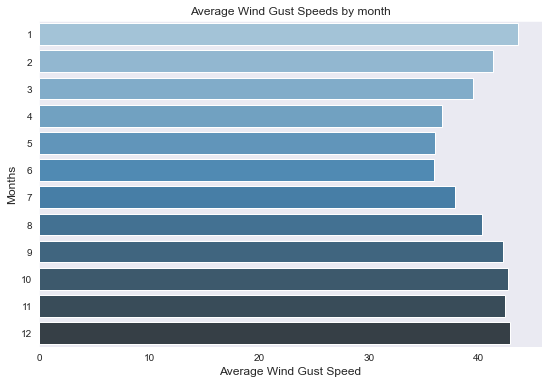

In [50]:
# Visualise

sns.set_style('dark')
fig, ax = plt.subplots(figsize=[9,6])
sns.barplot(x='WindGustSpeed', y='Month', linewidth=1,
             palette="Blues_d", 
            data=GustSpeedMonth,orient = 'h')

ax.set_title("Average Wind Gust Speeds by month", size = 12)
ax.set_xlabel('Average Wind Gust Speed',size = 12)
ax.set_ylabel('Months',size = 12)
plt.show()

### 3.8 Let's also see how humidity change from month to month and which year shows the highest humidity level.

In [51]:
#ExtractRelevantFields
HumYear = weather[['Year','Month','Humidity3pm']]
HumYear1 = weather[['Year','Month','Humidity9am']]

#Humidity change from month to month

Hum_9am_mon = HumYear1.groupby('Month').Humidity9am.aggregate([np.max,np.min,np.mean])
Hum_3pm_mon = HumYear.groupby('Month').Humidity3pm.aggregate([np.max,np.min,np.mean])

#Humidity change at year level
Hum_9am_year = HumYear1.groupby('Year').Humidity9am.aggregate([np.max,np.min,np.mean])
Hum_3pm_year = HumYear.groupby('Year').Humidity3pm.aggregate([np.max,np.min,np.mean])

print("Humidity change at month level :\n", Hum_9am_mon)
print('========================================')
print("Humidity change at month level :\n", Hum_3pm_mon)
print('========================================')
print("Humidity9am change at year level :\n", Hum_9am_year)
print('========================================')
print("Humidity3pm change at year level :\n", Hum_3pm_year)

Humidity change at month level :
         amax  amin       mean
Month                        
1      100.0   3.0  62.169276
2      100.0   6.0  67.298398
3      100.0  10.0  70.971153
4      100.0   1.0  70.999180
5      100.0   8.0  74.649593
6      100.0  10.0  79.603525
7      100.0   5.0  77.828251
8      100.0   5.0  71.879317
9      100.0   2.0  65.188359
10     100.0   0.0  63.254267
11     100.0   2.0  62.158543
12     100.0   4.0  61.664968
Humidity change at month level :
         amax  amin       mean
Month                        
1      100.0   1.0  46.454309
2      100.0   3.0  49.589986
3      100.0   3.0  50.563687
4      100.0   1.0  52.748984
5      100.0   4.0  55.480841
6      100.0   4.0  61.116193
7      100.0   1.0  58.403959
8      100.0   2.0  53.259458
9      100.0   1.0  50.714352
10     100.0   0.0  48.111384
11     100.0   0.0  48.353372
12     100.0   1.0  47.530923
Humidity9am change at year level :
        amax  amin       mean
Year                       

### 3.9 Let's pick two locations based on most rainy days and highest amount of rainfall for comparison. 


##### First, using the RainToday field, we see that Portland has the most number of rainy days and Woomera has the least number of rainy days.

In [52]:
weather_locrain = weather[['Location','RainToday']]
rain_bylocation = weather_locrain[weather_locrain["RainToday"] == "Yes"].groupby('Location').count()
rain_bylocation.sort_values(by=['RainToday'], ascending = False, inplace = True)
rain_bylocation.head()

,RainToday
Location,
Portland,1038
Dartmoor,883
Walpole,876
MountGambier,875
NorfolkIsland,866


In [53]:
rain_bylocation.tail()

,RainToday
Location,
Cobar,368
Moree,360
Mildura,315
AliceSprings,229
Woomera,192


##### Then we check which location observed the highest amount of rainfall. 

##### Cairns observed the highest amount of rainfall in 2010.

<AxesSubplot:title={'center':'Total Rainfall by Location'}, xlabel='Location', ylabel='Total Rainfall'>

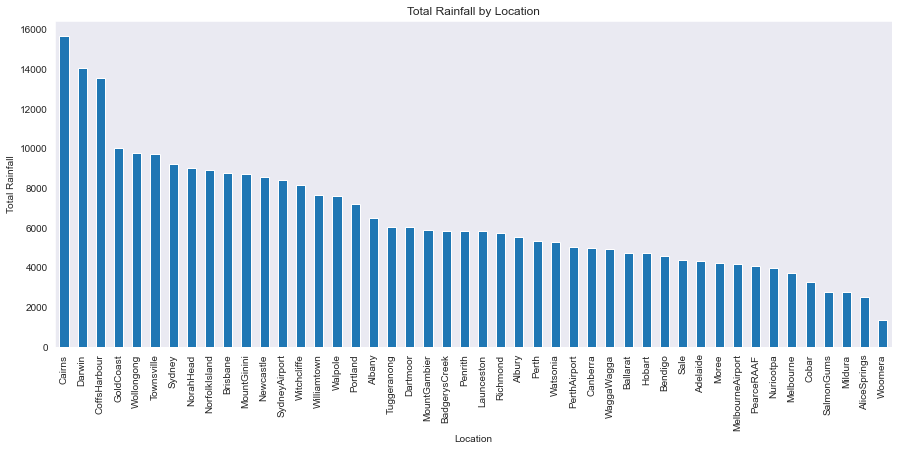

In [54]:
mostrainfall=weather.groupby(['Location']).sum()
mostrainfall.sort_values(by=['Rainfall'], ascending = False, inplace =True)
mostrainfall['Rainfall'].plot(kind = 'bar', figsize = [15,6], ylabel = 'Total Rainfall', title = 'Total Rainfall by Location')

In [55]:
# create subset of data for Cairns to see which year has the most rainfall

cairnsrainfall = weather[weather['Location']=='Cairns']
cairnsrainfall = cairnsrainfall.groupby(['Year']).sum()

In [56]:
cairnsrainfall['Rainfall']

Year
2009    2199.4
2010    2659.8
2011    2574.4
2012    1989.0
2013    1151.8
2014    1814.6
2015    1896.6
2016    1351.4
Name: Rainfall, dtype: float64

<AxesSubplot:title={'center':'Total Rainfall in Cairns'}, xlabel='Year', ylabel='Total Rainfall'>

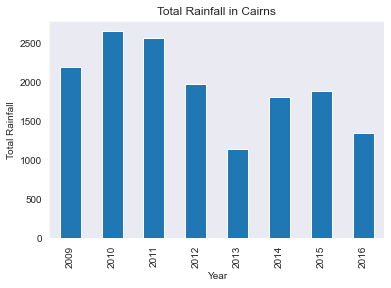

In [57]:
# visualizing Cairns total rainfall by year

cairnsrainfall['Rainfall'].plot(kind = 'bar', title = 'Total Rainfall in Cairns', xlabel = 'Year', ylabel = 'Total Rainfall')

#### Cairns observed most rainfall in 2010.

### 3.10 Compare Portland and Cairns rainy days and rainfall amount.

In [58]:
# get Portland subset data for comparison

portlandrainfall = weather[weather['Location']=='Portland']
portlandrainfall = portlandrainfall.groupby(['Year']).sum()

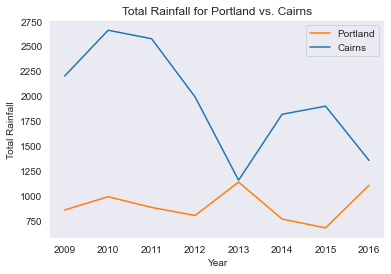

In [59]:
plt.plot(portlandrainfall['Rainfall'], label = 'Portland', color = 'C1')
plt.plot(cairnsrainfall['Rainfall'], label = 'Cairns', color = 'C0')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall for Portland vs. Cairns')
plt.legend()
plt.show()

#### Cairns lowest rainfall is in 2013, and that is Portland's highest rainfall year.

In [60]:
portlandcairns = weather[(weather['Location']=='Cairns') | (weather['Location']=='Portland')]
portlandcairns

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
74980,2009-01-01,Portland,12.5,16.6,0.0,SW,59.0,SW,SW,28.0,...,99.0,1006.7,1010.5,13.7,14.5,No,Yes,2009,1,1
74981,2009-01-02,Portland,8.6,15.2,1.6,SSW,39.0,SW,S,20.0,...,61.0,1020.0,1021.3,11.9,14.0,Yes,No,2009,1,2
74982,2009-01-03,Portland,1.6,18.0,0.2,S,30.0,NE,ESE,9.0,...,52.0,1020.4,1018.3,11.6,17.5,No,No,2009,1,3
74983,2009-01-04,Portland,4.8,20.1,0.0,S,28.0,E,S,11.0,...,63.0,1016.4,1015.2,14.7,18.1,No,No,2009,1,4
74984,2009-01-05,Portland,4.4,18.8,0.0,W,46.0,W,W,20.0,...,68.0,1014.0,1013.4,14.9,18.0,No,No,2009,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90044,2016-12-12,Cairns,23.0,29.0,17.2,SSE,39.0,S,SE,13.0,...,73.0,1013.3,1011.5,26.0,28.3,Yes,Yes,2016,12,12
90045,2016-12-13,Cairns,23.0,29.0,26.8,SSE,37.0,SSE,S,19.0,...,70.0,1013.6,1011.1,26.5,29.0,Yes,Yes,2016,12,13
90053,2016-12-21,Cairns,24.0,33.0,1.2,ESE,41.0,SE,E,20.0,...,49.0,1012.1,1009.7,29.4,31.6,Yes,No,2016,12,21
90054,2016-12-22,Cairns,22.4,33.0,0.0,E,39.0,SSE,E,13.0,...,49.0,1011.4,1008.8,29.1,31.7,No,No,2016,12,22


#### Compare Portland and Cairns rainy days.

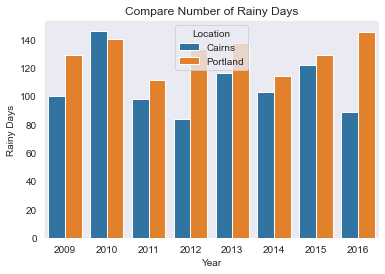

In [61]:
#Visualising
rainedtoday = portlandcairns[portlandcairns['RainToday'] == "Yes"]

count, ax = plt.subplots()

ax = sns.countplot(x = "Year", data = rainedtoday, hue = "Location", hue_order = ['Cairns','Portland'])
ax.set_title('Compare Number of Rainy Days')
ax.set_xlabel('Year')
ax.set_ylabel('Rainy Days')

plt.show()

#### Cairns saw most rainy days in 2010, while Portland was in 2016.

### 3.11 Compare Humidity3pm for Portland and Cairns. 

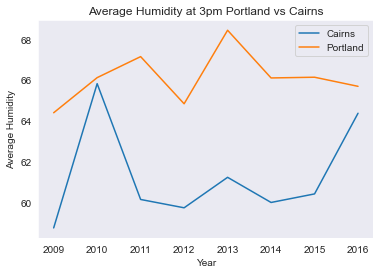

In [62]:
cairnshum = weather[weather['Location']=='Cairns']
cairnshum = cairnshum.groupby('Year').mean()
cairnshumidity = cairnshum['Humidity3pm']
portlandhum = weather[weather['Location']=='Portland']
portlandhum = portlandhum.groupby('Year').mean()
portlandhumidity = portlandhum['Humidity3pm']

plt.plot(cairnshumidity, label = 'Cairns', color = 'C0')
plt.plot(portlandhumidity, label = 'Portland', color = 'C1')
plt.xlabel('Year')
plt.ylabel('Average Humidity')
plt.title('Average Humidity at 3pm Portland vs Cairns')
plt.legend()
plt.show()

#### Portland’s humidity is highest in 2013, which is also the year Portland has the most rainfall.
#### Cairns observed highest humidity in 2010, the year Cairns has the highest rainfall and most rainy days.

### 3.11 Compare WindGustSpeed for Portland and Cairns. 

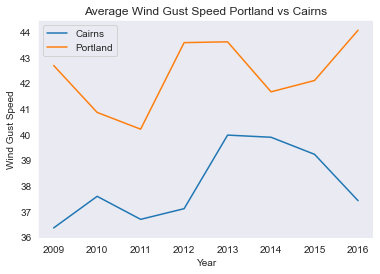

In [63]:
cairnswind = weather[weather['Location']=='Cairns']
cairnswind = cairnswind.groupby('Year').mean()
cairnswindgust = cairnswind['WindGustSpeed']
portlandwind = weather[weather['Location']=='Portland']
portlandwind = portlandwind.groupby('Year').mean()
portlandwindgust = portlandwind['WindGustSpeed']

plt.plot(cairnswindgust, label = 'Cairns', color = 'C0')
plt.plot(portlandwindgust, label = 'Portland', color = 'C1')
plt.xlabel('Year')
plt.ylabel('Wind Gust Speed')
plt.title('Average Wind Gust Speed Portland vs Cairns')
plt.legend()
plt.show()


#### Portland observed strongest wind gust in 2016, which is the year Portland has the most number of rainy days.
#### Cairns’ strongest wind gust year is in 2013, but it wasn’t the year where Cairns observed the highest rainfall or most rainy days, it was in 2010.


# 4. Data Modelling

### Last two things before we build data model. 

#### 1. Let's assign dummy variables to categorical columns 

#### 2. Change the values in RainToday and RainTomorrow to numbers

In [64]:
# change RainToday and RainTomorrow values from 'Yes' and 'No' to 1 and 0

weather_model['RainToday'] = weather_model['RainToday'].replace(['Yes','No'],[1,0])
weather_model['RainTomorrow'] = weather_model['RainTomorrow'].replace(['Yes','No'],[1,0])

C:\Users\mouli\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mouli\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [65]:
# assign dummy variables to categorical columns

categorical = ['WindGustDir', 'WindDir3pm', 'WindDir9am']

weather_model = pd.get_dummies(weather_model, columns = categorical, drop_first = True)
weather_model 

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
31,11.3,26.5,0.0,56.0,19.0,31.0,46.0,26.0,1004.5,1003.2,...,0,0,0,0,0,0,0,1,0,0
32,9.6,23.9,0.0,41.0,19.0,11.0,44.0,22.0,1014.4,1013.1,...,0,0,0,0,0,0,0,0,0,1
33,10.5,28.8,0.0,26.0,11.0,7.0,43.0,22.0,1018.7,1014.8,...,0,0,0,0,1,0,0,0,0,0
34,12.3,34.6,0.0,37.0,6.0,17.0,41.0,12.0,1015.1,1010.3,...,0,0,0,0,1,0,0,0,0,0
35,12.9,35.8,0.0,41.0,6.0,26.0,41.0,9.0,1012.6,1009.2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142121,25.6,33.2,0.6,39.0,11.0,22.0,81.0,66.0,1008.5,1004.7,...,0,0,0,0,0,0,0,0,0,0
142122,25.4,33.4,0.0,52.0,7.0,13.0,85.0,55.0,1006.6,1004.5,...,0,0,0,0,0,0,0,0,0,0
142125,25.2,31.7,25.2,41.0,17.0,26.0,93.0,66.0,1006.8,1003.5,...,0,0,1,0,0,0,0,0,0,0
142126,26.3,30.9,5.4,52.0,24.0,17.0,79.0,90.0,1003.9,1004.1,...,0,0,0,0,0,0,0,1,0,0


### We will fit two models and compare their accuracy.

#### 1. Model A: Fit a model with top 10 predictors found using SelectKBest

#### 2. Model B: Use the four significant variables as shown in Section 3.6

### Model A

#### We need to normalize the data because SelectKBest do not take negative X values. Temperature variables contain negative values, so we will address this by using the MinMaxScaler function.

In [66]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather_model)
weather_model = pd.DataFrame(scaler.transform(weather_model), index=weather_model.index, columns=weather_model.columns)
weather_model.iloc[0:5]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
31,0.463183,0.525275,0.0,0.382812,0.200000,0.341176,0.46,0.26,0.396694,0.4176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32,0.422803,0.468132,0.0,0.265625,0.200000,0.105882,0.44,0.22,0.560331,0.5760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33,0.444181,0.575824,0.0,0.148438,0.105882,0.058824,0.43,0.22,0.631405,0.6032,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,0.486936,0.703297,0.0,0.234375,0.047059,0.176471,0.41,0.12,0.571901,0.5312,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
35,0.501188,0.729670,0.0,0.265625,0.047059,0.282353,0.41,0.09,0.530579,0.5136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### After normalizing, we then use SelectKBest to select top 10 variables for Model A

In [67]:
from sklearn.feature_selection import SelectKBest, chi2
X = weather_model.loc[:,weather_model.columns!='RainTomorrow']
y = weather_model[['RainTomorrow']]
selector = SelectKBest(chi2, k=10) #top 10 columns
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) 

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Temp3pm',
       'RainToday', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NNW',
       'WindDir9am_SE'],
      dtype='object')


In [68]:
X = weather_model[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                   'Temp3pm', 'RainToday', 'WindDir9am_ESE', 'WindDir9am_N', 
                   'WindDir9am_NNW','WindDir9am_SE']]
y = weather_model[['RainTomorrow']]

ten_model = smf.logit(formula = 'y ~ X', data = weather_model)
results = ten_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.376578
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               101995
Model:                          Logit   Df Residuals:                   101984
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.2950
Time:                        17:20:59   Log-Likelihood:                -38409.
converged:                       True   LL-Null:                       -54481.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0737      0.085    -94.586      0.000      -8.241      -7.906
X[0]           3.6578      0.

In [69]:
odd_ratios1 = np.exp(results.params)
print(odd_ratios1)

Intercept      0.000312
X[0]          38.774125
X[1]         509.495681
X[2]           2.116069
X[3]         807.027184
X[4]           3.275638
X[5]           1.652275
X[6]           0.809552
X[7]           1.554485
X[8]           1.309520
X[9]           0.760103
dtype: float64


#### Split the data for training and validation, 70% for training and 30% for validation.

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\mouli\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [71]:
# Model A forecast accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.8410


In [72]:
# create confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[22390  1220]
 [ 3644  3345]]


#### The result is telling us that we have 22390 + 3345 = 25735 correct predictions and 1220 + 3644 = 4864 incorrect predictions.

Text(0.5, 257.44, 'Predicted label')

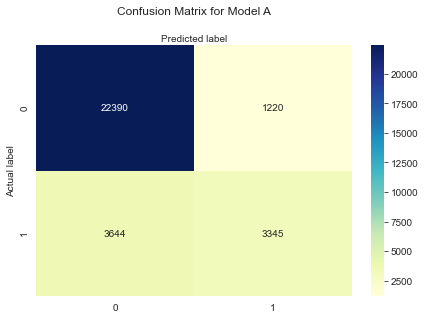

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Model A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

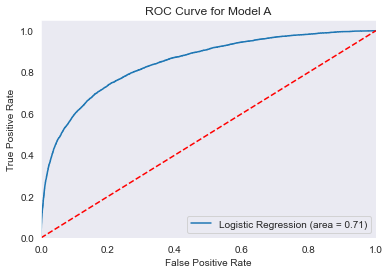

In [74]:
#create ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model A')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### The ROC curve has an area of 0.71

### Model B

In [75]:
# let's use the four significant quantitative predictors as found in section x for this model
# Humidity9am + Humidity3pm + Rainfall + WindGustSpeed

model2 = smf.logit(formula = 'RainTomorrow ~ Humidity9am + Humidity3pm + Rainfall + WindGustSpeed', data = weather_model)
results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.381056
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               101995
Model:                          Logit   Df Residuals:                   101990
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.2866
Time:                        17:21:00   Log-Likelihood:                -38866.
converged:                       True   LL-Null:                       -54481.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.5256      0.062   -122.179      0.000      -7.646      -7.405
Humidity9am       0.

#### We see that all predictors are significant as their p-values are close to 0, and we have an R^2 of 28.7%

In [76]:
# let's drop Humidity9am to see if the R^2 decrease

model3 = smf.logit(formula = 'RainTomorrow ~ Humidity3pm + Rainfall + WindGustSpeed', data = weather_model)
results3 = model3.fit()
print(results3.summary())

Optimization terminated successfully.
         Current function value: 0.381892
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               101995
Model:                          Logit   Df Residuals:                   101991
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.2851
Time:                        17:21:01   Log-Likelihood:                -38951.
converged:                       True   LL-Null:                       -54481.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.0314      0.047   -148.536      0.000      -7.124      -6.939
Humidity3pm       6.

In [77]:
odd_ratios3 = np.exp(results3.params)

In [78]:
print(odd_ratios3)

Intercept            0.000884
Humidity3pm       1020.195699
Rainfall         15084.771388
WindGustSpeed      536.723975
dtype: float64


#### After dropping Humidity9am, we see that all the predictors' p-values are still close to 0 and we have an R^2 of 28.5%. 

#### Since the R^2 did not decrease much, we will not include Humidity9am as a predictor. 

#### Let's call this Model B.

### Model B: Model Fitting

#### Next, we will check the accuracy of this model.

#### Split the data for training and validation, 70% for training and 30% for validation.

In [79]:
X2 = weather_model[['Humidity3pm', 'Rainfall','WindGustSpeed']]
y2 = weather_model[['RainTomorrow']]

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)

C:\Users\mouli\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [80]:
# Model B forecast accuracy

y2_pred = logreg.predict(X2_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X2_test, y2_test)))

Accuracy of logistic regression classifier on test set: 0.8394


#### The accuracy for this model is similar to Model A at 84%

In [81]:
# create confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y2_test, y2_pred)
print(confusion_matrix2)

[[22474  1136]
 [ 3777  3212]]


#### The result is telling us that we have 22474 + 3212 = 25686 correct predictions and 1136 + 3777 = 4913 incorrect predictions.

Text(0.5, 257.44, 'Predicted label')

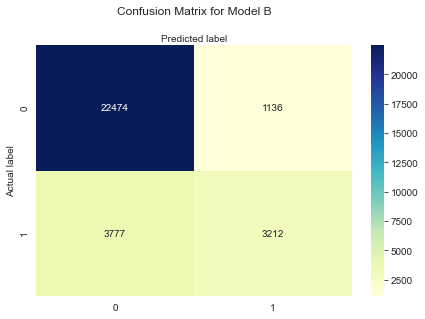

In [82]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Model B', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

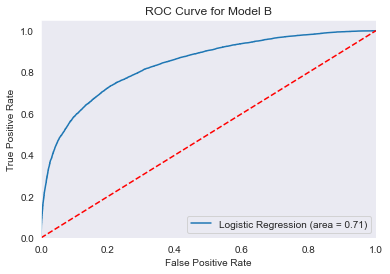

In [83]:
# create ROC curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y2_test, logreg.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logreg.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model B')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### ROC Curve is showing an area of 0.71, similar to Model A.

#### While the ROC curve area is the same for both model, the total number of correct prediction for Model A is slightly higher at 25735 vs. Model B 25686. That is because Model A has much more variables to improve the model accuracy.

#### Based on this exercise, we know that 'Humidity3pm', 'Rainfall' and 'WindGustSpeed' are the most significant predictors for next-day rain forecast because by having seven more predictors in Model A, the forecast accuracy only improved by 0.2%.